<img src="https://github.com/MCKasman/mckasman.github.io/blob/master/misc/medical.png?raw=true" width='300' height='300'>


# Introduction
I've always been curious why insurance rates differ between people, even if both individuals are identically healthy. How do health insurance agencies determine medical charges for individuals? *Should we eat more or eat less? To smoke or not to smoke?* Haha, it's always been clear in the real world that smoking will definitely hike up the price, but let's take advantage of the variables in this amazing dataset and see if they affect medical charges or not. Once we find out a pattern or variables related to charges, we can then develop a machine learning model to predict anyone else's medical charge within the constraints of the data we have. Most specifically, we'll be using **multiple linear regression (MLR)** in this notebook!

# **1. Exploratory Data Analysis (EDA)**

## Import Libraries
* To get started on our exploratory data analysis, let's first import all the libararies we'll be using

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import The Dataset
* Next, we will be importing the provided dataset, **"insurance.csv,"** into our notebook file
* Before creating our exploratory data analysis and machine learning model, we must check if there are any missing values in the dataset

In [2]:
# import dataset using Pandas
data = pd.read_csv('../input/insurance/insurance.csv')

# check if any columns have NaN values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no missing values so we can now start working with the dataset!

In [3]:
# output first five rows of the dataset using the ".head()" function
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Visualization of The Correlation Matrix (Heatmap)
* A good way to check correlations among variables in a dataset is by visualizing the correlation matrix as a heatmap
* I will be using the heatmap method in this article with the Seaborn library: https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

**However, we must first encode our catageorical variables: *sex, smoker, and region***

In [4]:
data = pd.get_dummies(data)

In [5]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Now that it's encoded we can start the process of visualizing the correlation matrix

In [6]:
# calculate variable correlations in regards to 'charges'
corr = data.corr()['charges'].sort_values()

In [7]:
# display correlation values
corr

smoker_no          -0.787251
sex_female         -0.057292
region_southwest   -0.043210
region_northwest   -0.039905
region_northeast    0.006349
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
charges             1.000000
Name: charges, dtype: float64

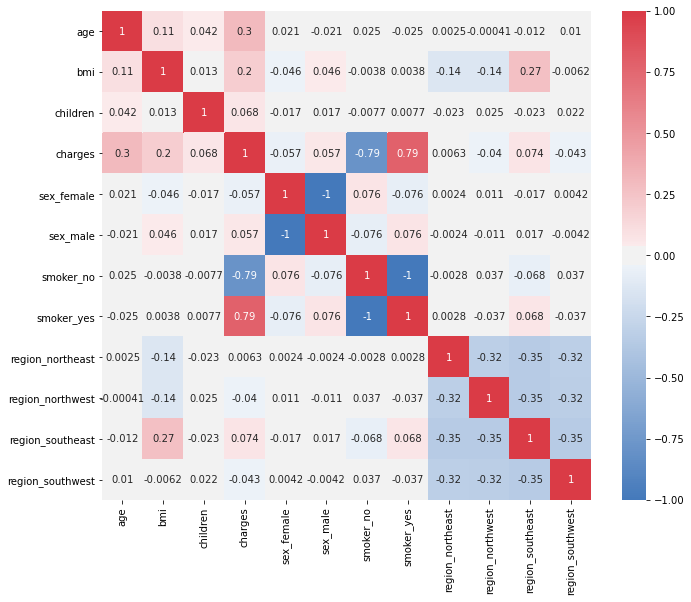

In [8]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(250,10,as_cmap=True),
            square=True,annot=True,ax=ax)

From the heatmap we can see that there is a **strong correlation** between being a **smoker** and the **medical charges.**

There is also small correlation between **age** and **medical charges** as well.

## Descriptive Statistics of Smokers and Non-Smokers
* We can get more numerical insight on smokers & non-smokers by using the 'describe()' function on the dataset

In [9]:
tmp_data = pd.read_csv('../input/insurance/insurance.csv')

# Descriptive statistics smoker
statistics_smoker = tmp_data[tmp_data['smoker'] == 'yes'].describe()
statistics_smoker.rename(columns=lambda x: x + '_smoker', inplace=True)

# Descriptive statistics non-smoker
statistics_non_smoker = tmp_data[tmp_data['smoker'] == 'no'].describe()
statistics_non_smoker.rename(columns=lambda x: x + '_non_smoker', inplace=True)

# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_smoker, statistics_non_smoker], axis=1)
statistics

,age_smoker,bmi_smoker,children_smoker,charges_smoker,age_non_smoker,bmi_non_smoker,children_non_smoker,charges_non_smoker
count,274.000000,274.000000,274.000000,274.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,38.514599,30.708449,1.113139,32050.231832,39.385338,30.651795,1.090226,8434.268298
std,13.923186,6.318644,1.157066,11541.547176,14.083410,6.043111,1.218136,5993.781819
min,18.000000,17.195000,0.000000,12829.455100,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.083750,0.000000,20826.244213,26.750000,26.315000,0.000000,3986.438700
50%,38.000000,30.447500,1.000000,34456.348450,40.000000,30.352500,1.000000,7345.405300
75%,49.000000,35.200000,2.000000,41019.207275,52.000000,34.430000,2.000000,11362.887050
max,64.000000,52.580000,5.000000,63770.428010,64.000000,53.130000,5.000000,36910.608030


* From the heatmap and descriptive statistics chart, we can infer that **being a smoker definitely increases medical charges**
* The **average charge of smokers (32,050.23)** is higher compared to  **non-smokers (8,434.27)**

But what other variables impact medical charges?

## Distribution of Variables
* Let's visualize the variables in our dataset, we want to view their distribution
* We will be using **histograms** and **bar charts** to visualize the variable distributions

Mode of Age: 18


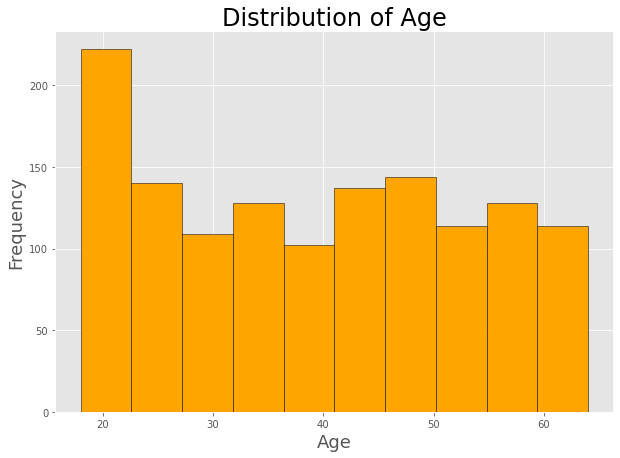

In [10]:
from statistics import mode 

plt.style.use('ggplot')

# histogram of ages
data.age.plot(kind='hist', color='orange', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Age', size=24)
plt.xlabel('Age', size=18)
plt.ylabel('Frequency', size=18)

# find most frequent age
mode_age = mode(data.age)
print('Mode of Age:', mode_age)

* There are more 18 year olds paying for medical charges than any other age
* Most people paying for medical charges are young

Average BMI: 30.663396860986538


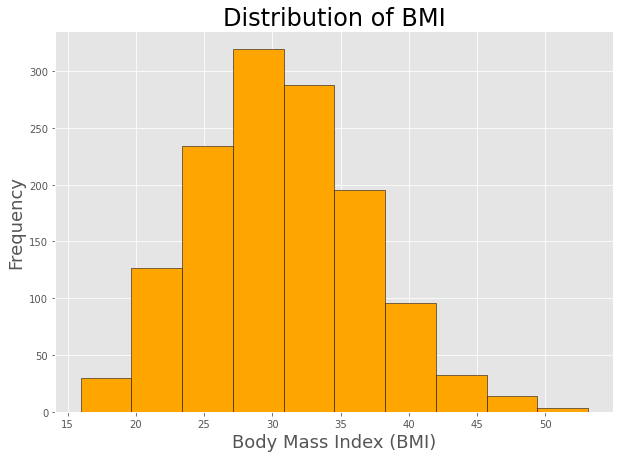

In [11]:
# histogram of BMI
data.bmi.plot(kind='hist', color='orange', edgecolor='black', figsize=(10,7))
plt.title('Distribution of BMI', size=24)
plt.xlabel('Body Mass Index (BMI)', size=18)
plt.ylabel('Frequency', size=18)

# find average BMI
avg_BMI = data.bmi.mean()
print('Average BMI:', avg_BMI)

* A BMI of 30.7 is considered overweight which may possibly affect medical charges

<img src = 'https://www.richardlipmanmd.com/wp-content/uploads/2019/01/BMI-Chart.jpg'>

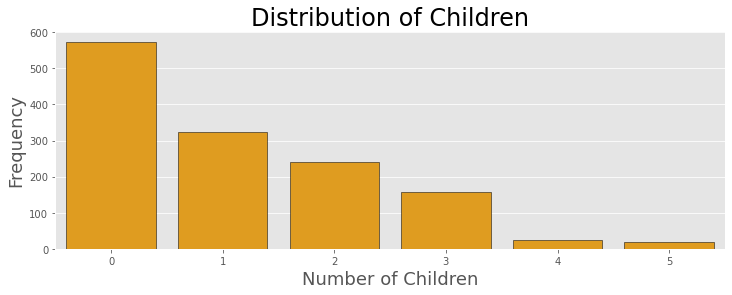

In [12]:
# countplot to compare the number of children
plt.figure(figsize=(12,4))
sns.countplot(x='children', data=data, color='orange', edgecolor='black') 
plt.title('Distribution of Children', size='24')
plt.ylabel('Frequency',size=18)
plt.xlabel('Number of Children',size=18)
plt.show()

* Majority of people paying for medical charges do not have children

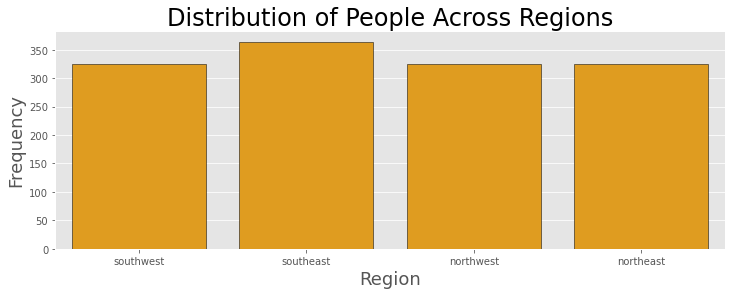

In [13]:
# countplot to compare the number of people from different regions
plt.figure(figsize=(12,4))
sns.countplot(x='region', data=tmp_data, color='orange', edgecolor='black') 
plt.title('Distribution of People Across Regions', size='24')
plt.ylabel('Frequency',size=18)
plt.xlabel('Region',size=18)
plt.show()

Text(0, 0.5, 'Frequency')

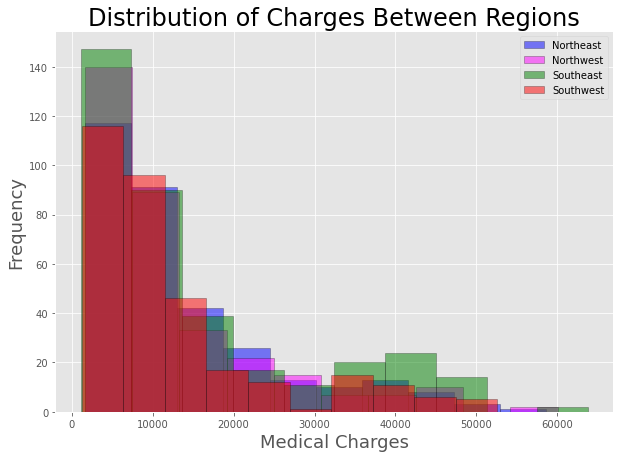

In [14]:
# histogram of region
data[data['region_northeast'] == 1].charges.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
data[data['region_northwest'] == 1].charges.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
data[data['region_southeast'] == 1].charges.plot(kind='hist', color='green', edgecolor='black', alpha=0.5, figsize=(10, 7))
data[data['region_southwest'] == 1].charges.plot(kind='hist', color='red', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Northeast','Northwest','Southeast','Southwest'])
plt.title('Distribution of Charges Between Regions', size=24)
plt.xlabel('Medical Charges', size=18)
plt.ylabel('Frequency', size=18)

* The **number of people** across the regions is about the same
* The **amount of medical charges** between regions do no vary drastically

Text(0, 0.5, 'Frequency')

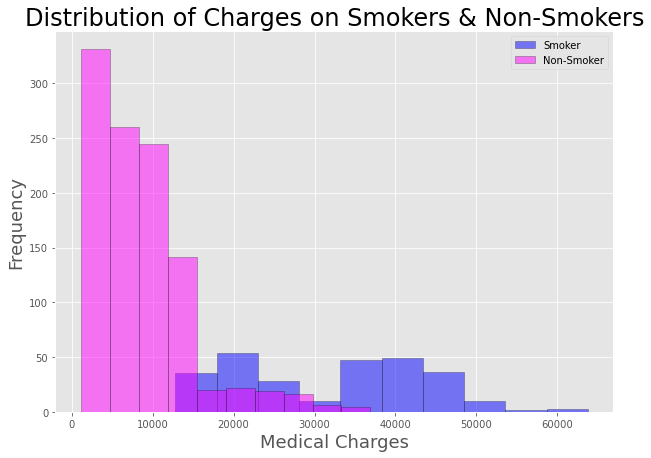

In [15]:
data[data['smoker_yes'] == 1].charges.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
data[data['smoker_no'] == 1].charges.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Smoker', 'Non-Smoker'])
plt.title('Distribution of Charges on Smokers & Non-Smokers', size=24)
plt.xlabel('Medical Charges', size=18)
plt.ylabel('Frequency', size=18)

* We can see that there are more non-smokers than smokers paying less medical charges

Text(0, 0.5, 'Frequency')

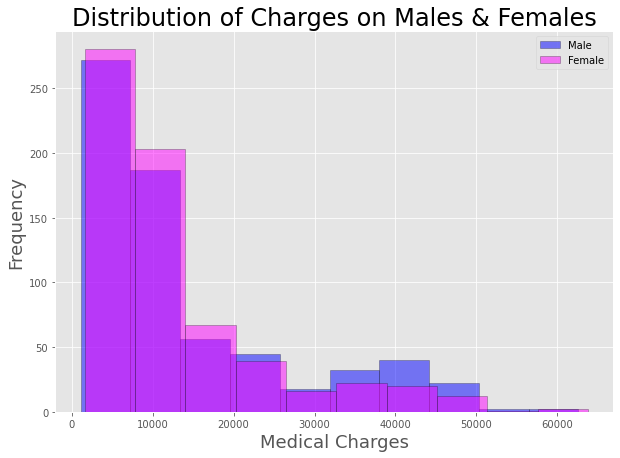

In [16]:
data[data['sex_male'] == 1].charges.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
data[data['sex_female'] == 1].charges.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Male', 'Female'])
plt.title('Distribution of Charges on Males & Females', size=24)
plt.xlabel('Medical Charges', size=18)
plt.ylabel('Frequency', size=18)

* The distribution of **medical charges on males and females** above show that it is normal

We now have more of an understanding of our dataset and what we should focus on: **age, BMI, number of children**

## Visulization of Variables Involving Medical Charges
* From our variable distrubtions, we know that **smoking** greatly affects the price of medical charges
* Medical charges are not affected by **sex** and **regions** as their distributions in regards to medical charges is normal

We will now further analyze if **age, BMI, and number of children** affects the price of medical charges.

### (A) Relationship Between Age & Medical Charges
How does **age** affect medical charges?

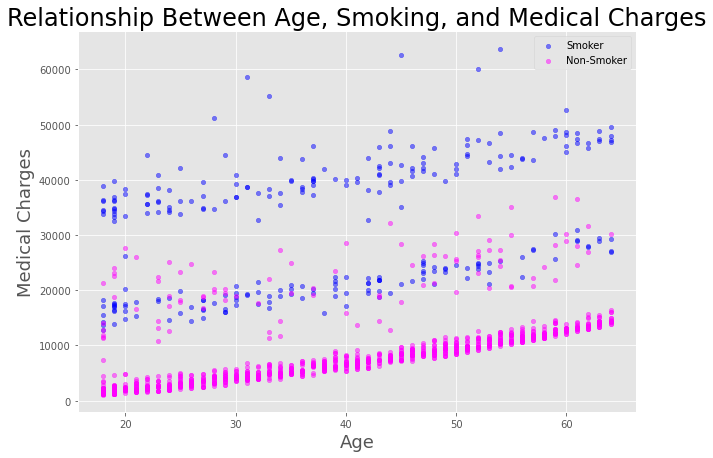

In [17]:
# scatter plot of Age, Smokers, and Medical Charges
ax1 = data[data['smoker_yes'] == 1].plot(kind='scatter', x='age', y='charges', color='blue', alpha=0.5, figsize=(10, 7))
data[data['smoker_no'] == 1].plot(kind='scatter', x='age', y='charges', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)

# legend, title, and labels
plt.legend(labels=['Smoker', 'Non-Smoker'])
plt.title('Relationship Between Age, Smoking, and Medical Charges', size=24)
plt.xlabel('Age', size=18)
plt.ylabel('Medical Charges', size=18);

* We could infer from the upward trend in the plot above that **increasing age increases medical charges**
* Other variables such as **BMI, and children** could also explain the deviation of points in medical charges straying away from the trend of smokers and non-smokers above

### (B) Relationship Between BMI & Medical Charges
How does **BMI** affect medical charges?

Text(0, 0.5, 'Medical Charges')

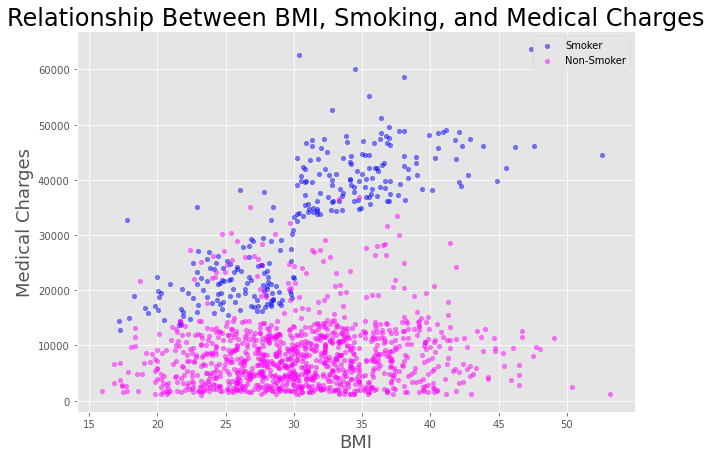

In [18]:
# scatter plot of BMI, Smokers, and Medical Charges
ax1 = data[data['smoker_yes'] == 1].plot(kind='scatter', x='bmi', y='charges', color='blue', alpha=0.5, figsize=(10, 7))
data[data['smoker_no'] == 1].plot(kind='scatter', x='bmi', y='charges', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Smoker', 'Non-Smoker'])
plt.title('Relationship Between BMI, Smoking, and Medical Charges', size=24)
plt.xlabel('BMI', size=18)
plt.ylabel('Medical Charges', size=18)

We want to check if being unhealthy affects medical charges. Other than smoking, we can check the health of people with their BMI. Being **underweight, overweight, and obese** is considered unhealthy.

Average Medical Charge (Underweight BMI): 8657.620652380954


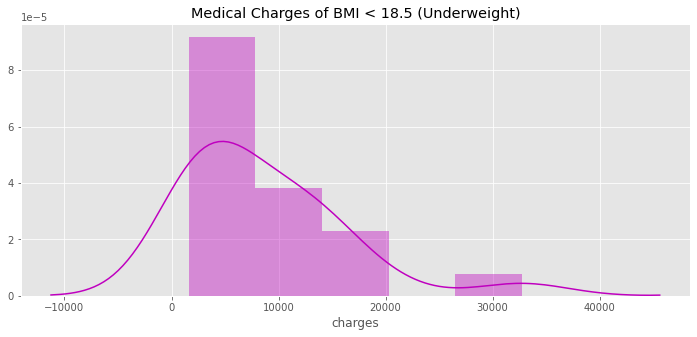

In [19]:
# plot for underweight
plt.figure(figsize=(12,5))
plt.title("Medical Charges of BMI < 18.5 (Underweight)")
ax = sns.distplot(data[(data.bmi <= 18.5)]['charges'], color = 'm')

# calculate average medical charge for someone underweight
underweight_charge = data[(data.bmi <= 18.5)]['charges'].mean()
print('Average Medical Charge (Underweight BMI):', underweight_charge)

Average Medical Charge (Normal BMI): 10410.46530625551


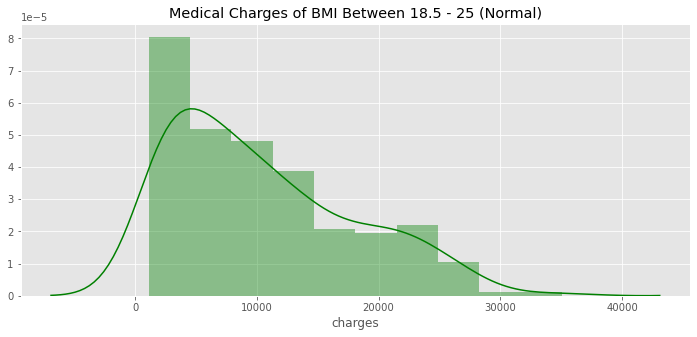

In [20]:
# plot for normal weight
plt.figure(figsize=(12,5))
plt.title("Medical Charges of BMI Between 18.5 - 25 (Normal)")
ax = sns.distplot(data[(data.bmi.between(18.5,25))]['charges'], color = 'g')

# calculate average medical charge for someone normal
normal_charge = data[data.bmi.between(18.5,25)]['charges'].mean()
print('Average Medical Charge (Normal BMI):', normal_charge)

Average Medical Charge (Overweight BMI): 10995.430252703607


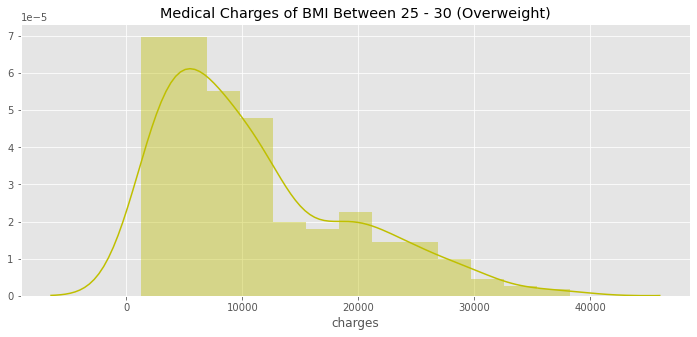

In [21]:
# plot for overweight
plt.figure(figsize=(12,5))
plt.title("Medical Charges of BMI Between 25 - 30 (Overweight)")
ax = sns.distplot(data[(data.bmi.between(25,30))]['charges'], color = 'y')

# calculate average medical charge for someone overweight
overweight_charge = data[data.bmi.between(25,30)]['charges'].mean()
print('Average Medical Charge (Overweight BMI):', overweight_charge)

Average Medical Charge (Obese BMI): 15552.335468868452


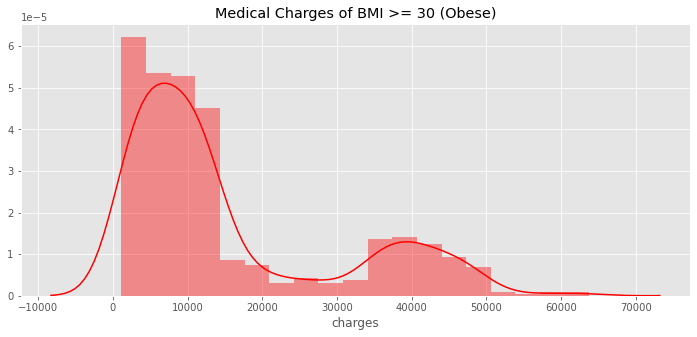

In [22]:
# plot for obese
plt.figure(figsize=(12,5))
plt.title("Medical Charges of BMI >= 30 (Obese)")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'r')

# calculate average medical charge for someone obese
obese_charge = data[data.bmi >= 30]['charges'].mean()
print('Average Medical Charge (Obese BMI):', obese_charge)

It's quite interesting how **the average medical charge for someone underweight is less than someone with a normal BMI** since being underweight is related to more health issues.
* Based on the plots and average medical charge across BMI types, **higher medical charge is dependent on higher BMI.**

### (C) Relationship Between Children & Medical Charges
Will the **number of children** affect medical charge?

In [23]:
# calculate average medical charge for someone with zero children
zero_child = data[(data.children == 0)]['charges'].mean()
print('Average Medical Charge (Zero Children):', zero_child)

# calculate average medical charge for someone with one child
one_child = data[(data.children == 1)]['charges'].mean()
print('Average Medical Charge (One Child):', one_child)

# calculate average medical charge for someone with two children
two_child = data[(data.children == 2)]['charges'].mean()
print('Average Medical Charge (Two Children):', two_child)

# calculate average medical charge for someone with three children
three_child = data[(data.children == 3)]['charges'].mean()
print('Average Medical Charge (Three Children):', three_child)

# calculate average medical charge for someone with four children
four_child = data[(data.children == 4)]['charges'].mean()
print('Average Medical Charge (Four Children):', four_child)

# calculate average medical charge for someone with five children
five_child = data[(data.children == 5)]['charges'].mean()
print('Average Medical Charge (Five Children):', five_child)

Average Medical Charge (Zero Children): 12365.975601635882
Average Medical Charge (One Child): 12731.171831635793
Average Medical Charge (Two Children): 15073.563733958328
Average Medical Charge (Three Children): 15355.31836681528
Average Medical Charge (Four Children): 13850.656311199999
Average Medical Charge (Five Children): 8786.035247222222


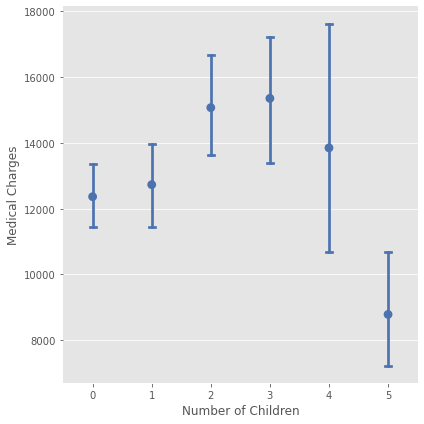

In [24]:
g= sns.catplot(x="children", y='charges', hue=None, data=tmp_data,
                height= 6, kind="point", aspect=1.0, legend_out=True, width=0.4, linewidth=3,  linestyles = '--', capsize=.1, dodge= 0.15,
                sharey=True, 
                palette = sns.color_palette("deep", n_colors = 1))

g.despine(left=True)
g.set_titles("Relationship Between Children and Medical Charges", weight='bold')
g.set_axis_labels("Number of Children", "Medical Charges")

* We can see there is **no clear pattern between the number of children and medical charges.**

Let's plot a comparison between smokers and non-smokers and the number of children they have.

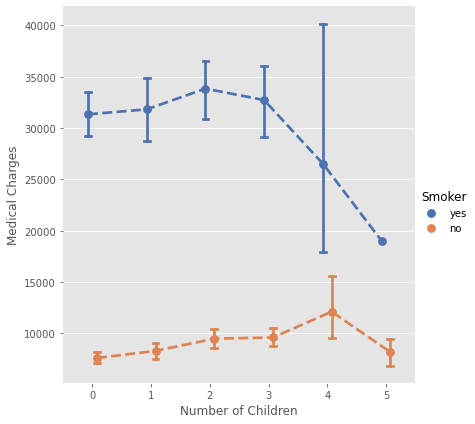

In [25]:
g= sns.catplot(x="children", y='charges', hue='smoker', data=tmp_data,
                height= 6, kind="point", aspect=1.0, legend_out=True, width=0.4, linewidth=3,  linestyles = '--', capsize=.1, dodge= 0.15,
                sharey=True, 
                palette = sns.color_palette("deep", n_colors = 2))

g.despine(left=True)
g.set_titles("Relationship Between Children, Smoker, and Medical Charges", weight='bold')
g.set_axis_labels("Number of Children", "Medical Charges")
g._legend.set_title("Smoker")

* From the plot above we can see the **difference of medical charge between smokers and non-smokers with having the same number of children**
* The number of children doesn't seem to affect medical charges, rather **smoking** causes the great difference in medical charges

## EDA Results
Through analyzing the variables in the dataset we found that only your **age, BMI,** and being a **smoker** impacts medical charge prices. **Sex, region, and the number of children** does not affect the price of medical charges.

**MEDICAL CHARGE WILL BE AFFECTED BECAUSE OF...** 
* **Age:** The price of medical charges increases the older you become.
* **BMI:** The higher your BMI level, the higher your medical charge will be.
* **Smoker:** *Smoke and become broke.* Medical charge price will sky rocket if you're a smoker!
    * From our descriptive statistics analysis earlier: ***the average charge of smokers (32,050.23) is higher compared to non-smokers (8,434.27)***
    
**MEDICAL CHARGE WILL NOT BE AFFECTED BECAUSE OF...** 
* **Sex:** Your sex will not impact medical charges. Male or female, the medical charge price is approximate.
* **Region:** Where you live will not affect medical charges, the distribution of charges is about the same across all regions.
* **Number of Children:** The number of children  dependent on you will not affect the price of your medical charge.

# 2. Multiple Linear Regression (MLR) Model
With the multiple variables we have within the dataset, we will create an MLR model to predict the price of someone's medical charge.

## Import and Initialize Independent & Dependent Variables
Let's import the dataset again and create our 'x' (independent) & 'y' (dependent) variables.

We will be dropping the **'regions'** column because of ***multicollinearity*** - this may skew our model.

In [26]:
# import dataset using Pandas
data = pd.read_csv('../input/insurance/insurance.csv')

# drop regions column
data = data.drop(['region'], axis=1)

In [27]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [28]:
# set independent and dependent variables
x = data.iloc[:,:-1].values # age, sex, BMI, children, smoker, region
y = data.iloc[:,-1].values # charges

print('Independent Variables\n',x)
print('\nDependent Variables\n',y)

Independent Variables
 [[19 'female' 27.9 0 'yes']
 [18 'male' 33.77 1 'no']
 [28 'male' 33.0 3 'no']
 ...
 [18 'female' 36.85 0 'no']
 [21 'female' 25.8 0 'no']
 [61 'female' 29.07 0 'yes']]

Dependent Variables
 [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


## Encode Categorical Data (Independent Variables)
Instead of using the 'pd.get_dummy()'function to encode our categorical variables, we'll be using a OneHotEncoder.

In [29]:
# get column index of categorical variables (sex, smoker, region)
print('Sex Column Index:', data.columns.get_loc('sex'))
print('Smoker Column Index:', data.columns.get_loc('smoker'))

Sex Column Index: 1
Smoker Column Index: 4


In [30]:
# import module for one-hot encoding scheme
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# sex and smoker column index is 1 and 4
dummy_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4])], remainder='passthrough')
x = np.array(dummy_transformer.fit_transform(x))

## Split The Dataset Into The Training & Test Set

In [31]:
# import module to split data into training and test set
from sklearn.model_selection import train_test_split 

# 80% training & 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Train The Multiple Linear Regression Model On The Training Set

In [32]:
# import the LinearRegression() class
from sklearn.linear_model import LinearRegression

# create a regressor model
regressor = LinearRegression()

# fit the training data, feature scaling is not needed for regression models
regressor.fit(x_train, y_train)

LinearRegression()

## Predict The Test Set Results

In [33]:
# the vector of the predicted medical charges in the training set
y_train_pred = regressor.predict(x_train)

# the vector of the predicted medical charges in the test set
y_test_pred = regressor.predict(x_test)

In [34]:
# compare y_test_pred (prediction) to the y_test (actual)
i = 0
while i < len(y_test_pred):
    diff = abs(round(y_test_pred[i], 2) - y_test[i])
    print("Predicted: " + str(round(y_test_pred[i], 2)) + " vs Actual: " + str(round(y_test[i], 2)) +
          " ---> Difference: " + str(round(diff, 2)))
    i += 1

Predicted: 11448.71 vs Actual: 9724.53 ---> Difference: 1724.18
Predicted: 9931.23 vs Actual: 8547.69 ---> Difference: 1383.54
Predicted: 37772.72 vs Actual: 45702.02 ---> Difference: 7929.3
Predicted: 15935.74 vs Actual: 12950.07 ---> Difference: 2985.67
Predicted: 6889.98 vs Actual: 9644.25 ---> Difference: 2754.27
Predicted: 3598.64 vs Actual: 4500.34 ---> Difference: 901.7
Predicted: 1127.08 vs Actual: 2198.19 ---> Difference: 1071.11
Predicted: 14062.32 vs Actual: 11436.74 ---> Difference: 2625.58
Predicted: 8767.66 vs Actual: 7537.16 ---> Difference: 1230.5
Predicted: 7233.73 vs Actual: 5425.02 ---> Difference: 1808.71
Predicted: 4152.87 vs Actual: 6753.04 ---> Difference: 2600.17
Predicted: 10116.71 vs Actual: 10493.95 ---> Difference: 377.24
Predicted: 9081.38 vs Actual: 7337.75 ---> Difference: 1743.63
Predicted: 4308.38 vs Actual: 4185.1 ---> Difference: 123.28
Predicted: 27687.94 vs Actual: 18310.74 ---> Difference: 9377.2
Predicted: 11169.66 vs Actual: 10702.64 ---> Differe

## Calculate Mean Squared Error (MSE) and R-Squared (R2) Values
To see how well the model predicts medical charges, we must calculate the MSE and R2 values

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# calculate MSE values on the training and test set
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

# calculate R2 values on the training and test set
R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

print('MSE (Training):', MSE_train)
print('MSE (Test):', MSE_test)

print('\nR2 (Training):', R2_train)
print('R2 (Test):', R2_test)

MSE (Training): 37828752.95429108
MSE (Test): 32165826.643605106

R2 (Training): 0.7361388804467515
R2 (Test): 0.7978644236809906


## Making a Single Prediction
For example the medical charge of someone with these factors: 
* **Sex** = Female, **Smoker** = Yes, **Age** = 19, **BMI** = 27.9, **Children** = 0

In [36]:
"""
regressor.predict([[sex_female, sex_male, smoker_no, smoker_yes, age, BMI, children]])

Only for categorical variables:
1 - Yes/True
0 - No/False
"""
# enter categorical and numerical inputs
print(regressor.predict([[1,0,0,1,19,27.90,0]]))

[25479.35757756]


# Conclusion
* **Age, BMI, and being a smoker** affects the price of medical charges for individuals
    * Medical charge **increases** as age and BMI **increases**
    * Medical charge will always be high if you're a smoker
* Although not 100% accurate, our MLR model is **fairly accurate** as it predicates a medical charge close to the actual price. We can try other types of regression to get better results such as **random forest** and **support vector regression**

If you liked my notebook please give it an **upvote!** Also please comment if you have any feedback as this is my first notebook on Kaggle!

# References
I definitely learned a lot on exploratory data analysis for this notebook from these sources:
* https://www.kaggle.com/hely333/eda-regressio
* https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c
* https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07